In [144]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os

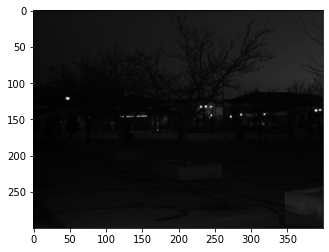

In [2]:
# image upload and color conversion

path ='C:/Users/user3/Downloads/Documents/Training/3_Image_Processing_Labs/Lab3/input/university.jpg'
img=cv.imread(path)
img=cv.cvtColor(img, cv.COLOR_RGB2GRAY)
#cv.imshow() crashes the browser unless the next two lines are also added

#cv.imshow('image',img)
#cv.waitKey(0)
#cv.destroyAllWindows()
plt.imshow(img,'gray')

<function matplotlib.pyplot.show(close=None, block=None)>

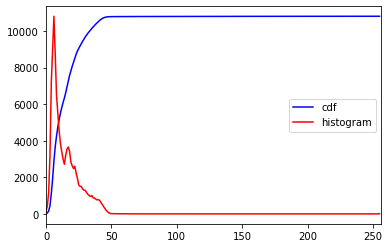

In [182]:
# histogram using built in functions

hist,bins=np.histogram(img.flatten(),256,[0,256])
cdf=hist.cumsum()
cdf_normalized=cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized,color='b')
#the following command is computing a histogram in itself
#plt.hist(img.flatten(),256,[0,256],color = 'r') 
plt.plot(hist,color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc='center right')
plt.show


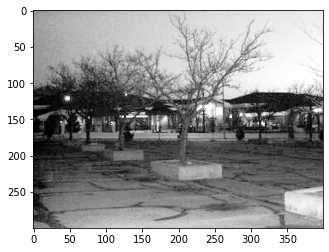

In [183]:
#histogram q=equlization using buit in function
equ=cv.equalizeHist(img)
plt.imshow(equ,'gray')


<function matplotlib.pyplot.show(close=None, block=None)>

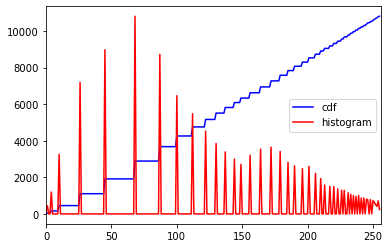

In [184]:
#comparison equalized vs unequalized histogram images.
hist,bins=np.histogram(equ,256,[0,256])
cdf=hist.cumsum();
cdf_normalized=cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized,color='b')
plt.plot(hist,color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc='center right')
plt.show


In [185]:
# functions
def image_histogram(img):
    x=img.shape[0]
    y=img.shape[1]
    hist=np.zeros((256,),dtype=float)
    for i in range (0,256):
        hist[i]=len(np.argwhere(img==i))
    return hist

def histogram_cdf(hist):
    cdf=np.zeros(hist.size,dtype=int)
    for i in range(0,len(cdf)):
        cdf[i]=sum(hist[0:i+1])
        
    return cdf

def histogram_cdf2(hist,clip):
    cdf=np.zeros(hist.size,dtype=int)
    res=0;
    for i in range(0,len(cdf)):
        cdf[i]=sum(hist[0:i+1])
        if (cdf[i]>clip):
            res=res+cdf[i]-clip
            cdf[i]=clip
    cdf=cdf+np.ceil(res/256)
    return cdf

         

In [186]:
# histogram equalization functions

def equalize_histogram(img):
    out=np.zeros(img.shape)
    hist=image_histogram(img)
    cdf=histogram_cdf(hist)
    cdf_normalized=cdf/cdf.max()
    s_k=np.round(cdf_normalized*255)
    for i in range(0,256):
        out[np.where(img==i)]=s_k[i]
            
    return out

def equalize_histogram2(img):
    hist=image_histogram(img)
    cdf=histogram_cdf(hist)
    cdf_normalized=cdf/cdf.max()
    s_k=np.round(cdf_normalized*255)
    return s_k[value]

def equalize_histogram3(img,clip):
    hist=image_histogram(img)
    cdf=histogram_cdf2(hist,clip)
    cdf_normalized=cdf/cdf.max()
    s_k=np.round(cdf_normalized*255)
    for i in range(0,256):
        out[np.where(img==i)]=s_k[i]
            
    return out

# adaptive histogram equalization patch wise
def AHE_patchwise(img,r,c):
    x=img.shape[0]
    y=img.shape[1]
    out=np.zeros(img.shape)
    for i in range(0,x,r):
        for j in range(0,y,c):
            temp=equalize_histogram(img[i:min(i+r,x),j:min(j+c,y)])            
            out[i:min(i+r,x),j:min(j+c,y)]=temp
            
    return out
            
# adaptive histogram equalization (pixel wise)
# this is so slow and inefficient
# one result is saved and will be displayed.

def AHE_pixelwise(img,r,c):
    x=img.shape[0]
    y=img.shape[1]
    out=np.zeros(img.shape)
    for i in range(0,x):
        for j in range(0,y):
            temp=img[max(0,i-r):min(i+r,x),max(0,j-c):min(j+c,y)]
            temp=equalize_histogram2(temp,img[i,j])            
            out[i,j]=temp
            
    return out

def CLAHE_patchwise(img,r,c,clip):
    x=img.shape[0]
    y=img.shape[1]
    out=np.zeros(img.shape)
    for i in range(0,x,r):
        for j in range(0,y,c):
            temp=equalize_histogram(img[i:min(i+r,x),j:min(j+c,y)])            
            out[i:min(i+r,x),j:min(j+c,y)]=temp
            
    return out

In [187]:
# Test images for Q1,2,3

path1='C:/Users/user3/Downloads/Documents/Training/3_Image_Processing_Labs/Lab3/input/asian.jpg'
path2='C:/Users/user3/Downloads/Documents/Training/3_Image_Processing_Labs/Lab3/input/landscape.jpg'
path3='C:/Users/user3/Downloads/Documents/Training/3_Image_Processing_Labs/Lab3/input/university.jpg'
path4='C:/Users/user3/Downloads/Documents/Training/3_Image_Processing_Labs/Lab3/input/vislab.jpg'
img1=cv.imread(path1,0)
img2=cv.imread(path2,0)
img3=cv.imread(path3,0)
img4=cv.imread(path4,0)
img5=np.random.randint(255,size=(100,100))



In [188]:
# ------Plotting Functions---------------------------------

def histogram_comparison(img):
    fig, ax = plt.subplots(2, 2,figsize=(20,12))
    img_e=equalize_histogram(img)
    ax[0][0].imshow(img,'gray')
    ax[0][0].set_title('Original Image')
    ax[0][1].imshow(img_e,'gray')
    ax[0][1].set_title('Equalized Histogram Image')
    ax[1][0].plot(image_histogram(img),'gray')
    ax[1][0].set_title('Histogram of the original Image')
    ax[1][1].plot(image_histogram(img_e),'gray')
    ax[1][1].set_title('Equalized histogram')
    plt.show

def AHE_comparison(img,r,c):
    fig, ax = plt.subplots(2, 2,figsize=(20,12))
    img_AHE=AHE_patchwise(img,r,c)
    img_e=equalize_histogram(img)
    ax[0][0].imshow(img_e,'gray')
    ax[0][0].set_title('Normal Equalized')
    ax[0][1].imshow(img_AHE,'gray')
    ax[0][1].set_title('Adaptive Equalized Histogram Image')
    ax[1][0].plot(image_histogram(img_e),'gray')
    ax[1][0].set_title('Histogram of the Equalized Image')
    ax[1][1].plot(image_histogram(img_AHE),'gray')
    ax[1][1].set_title('Adaptive Equalized histogram')
    plt.show

def CLAHE_comparison(img,r,c,clip):
    fig, ax = plt.subplots(2, 2,figsize=(20,12))
    img_AHE=CLAHE_patchwise(img,r,c,clip)
    img_e=AHE_patchwise(img,r,c)
    ax[0][0].imshow(img_e,'gray')
    ax[0][0].set_title('AHE Equalized')
    ax[0][1].imshow(img_AHE,'gray')
    ax[0][1].set_title('CL Adaptive Equalized Histogram Image')
    ax[1][0].plot(image_histogram(img_e),'gray')
    ax[1][0].set_title('Histogram of the AHE Image')
    ax[1][1].plot(image_histogram(img_AHE),'gray')
    ax[1][1].set_title('CL Adaptive Equalized histogram')
    plt.show


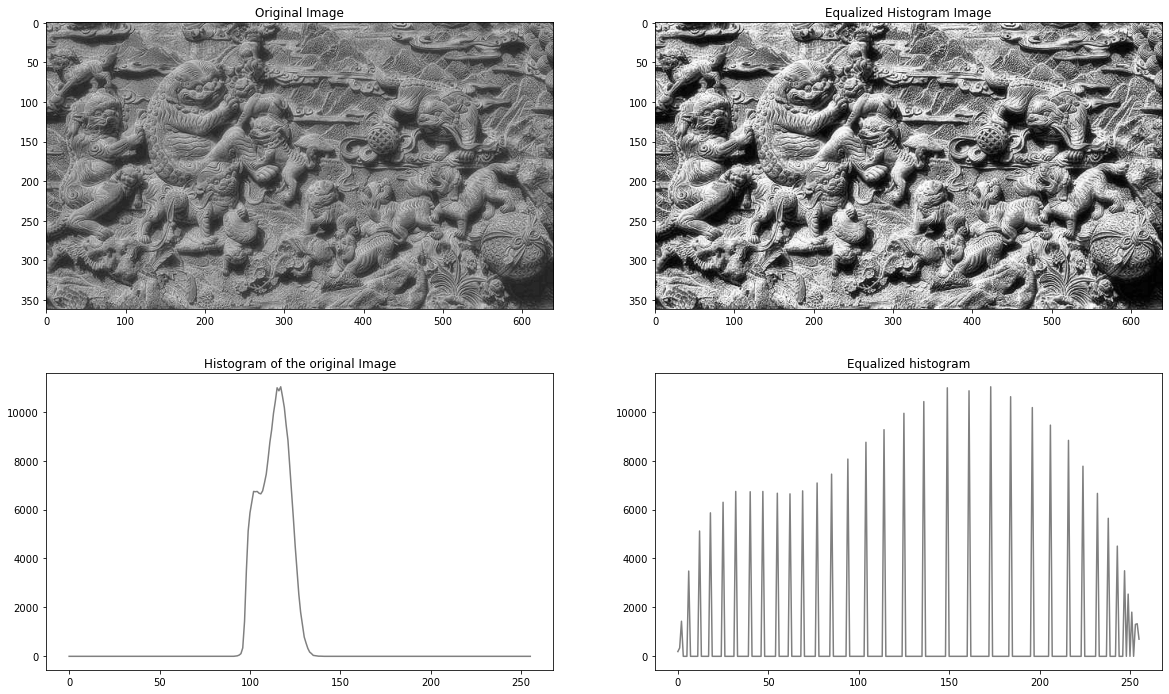

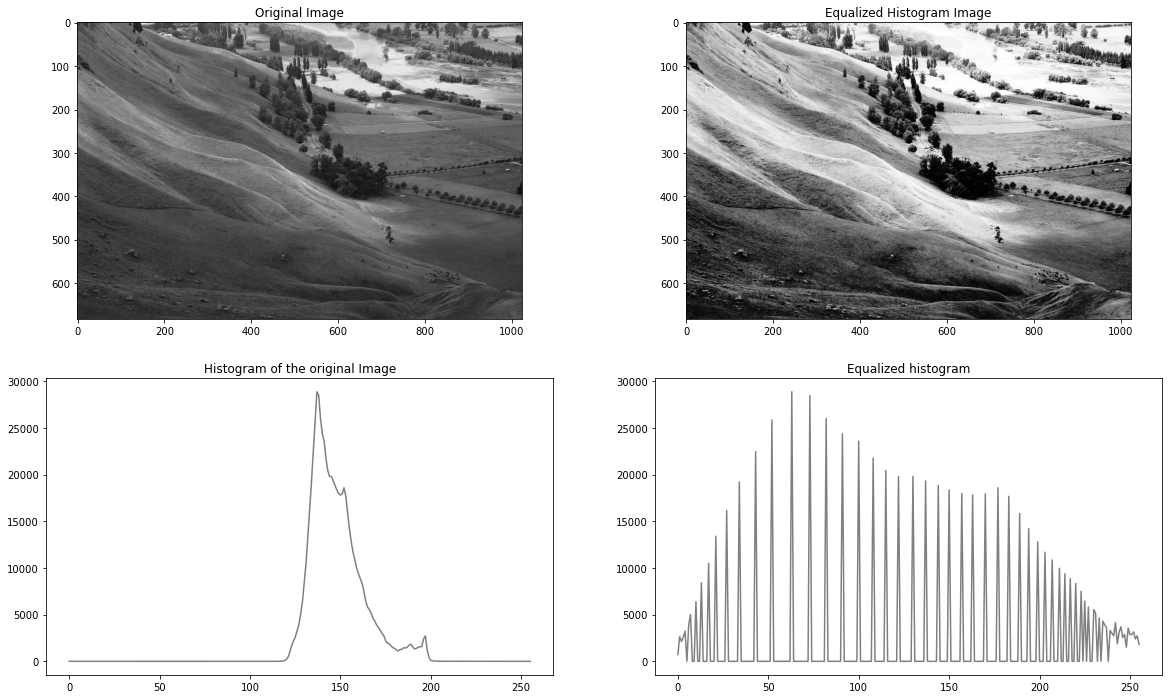

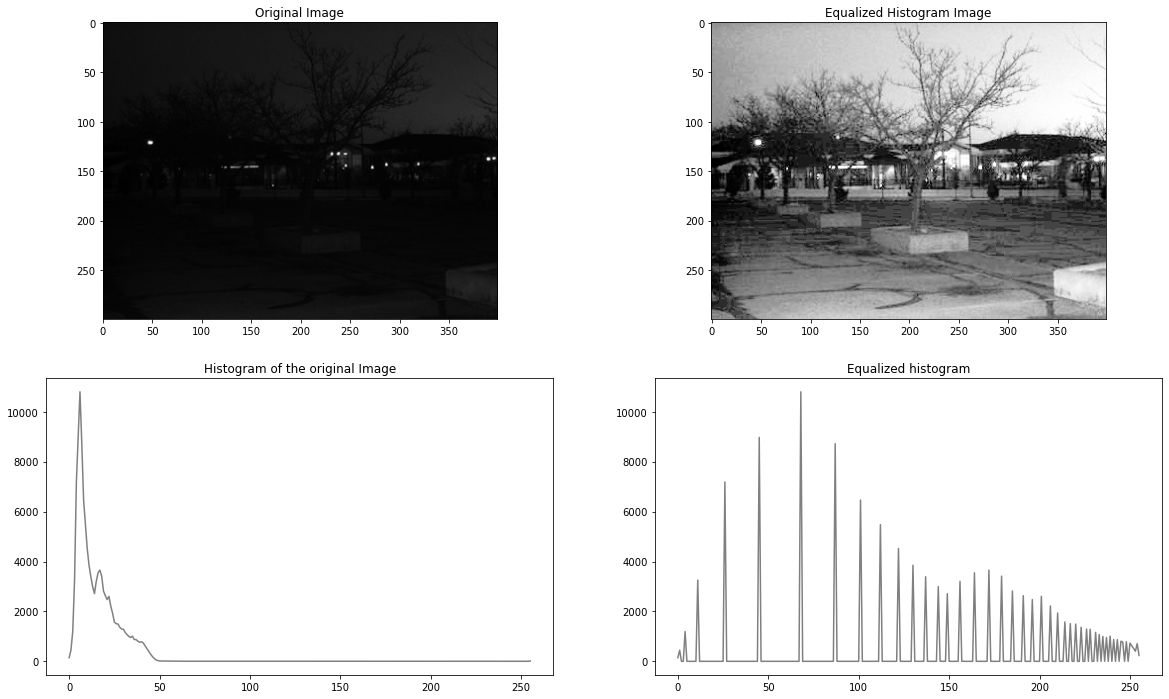

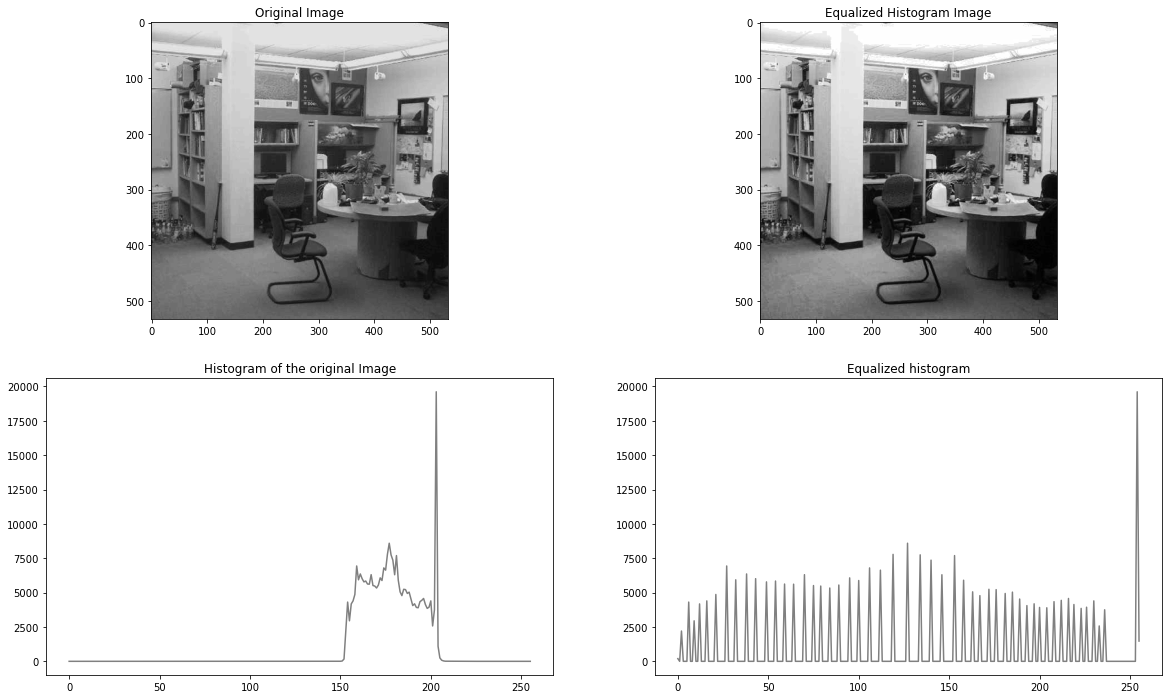

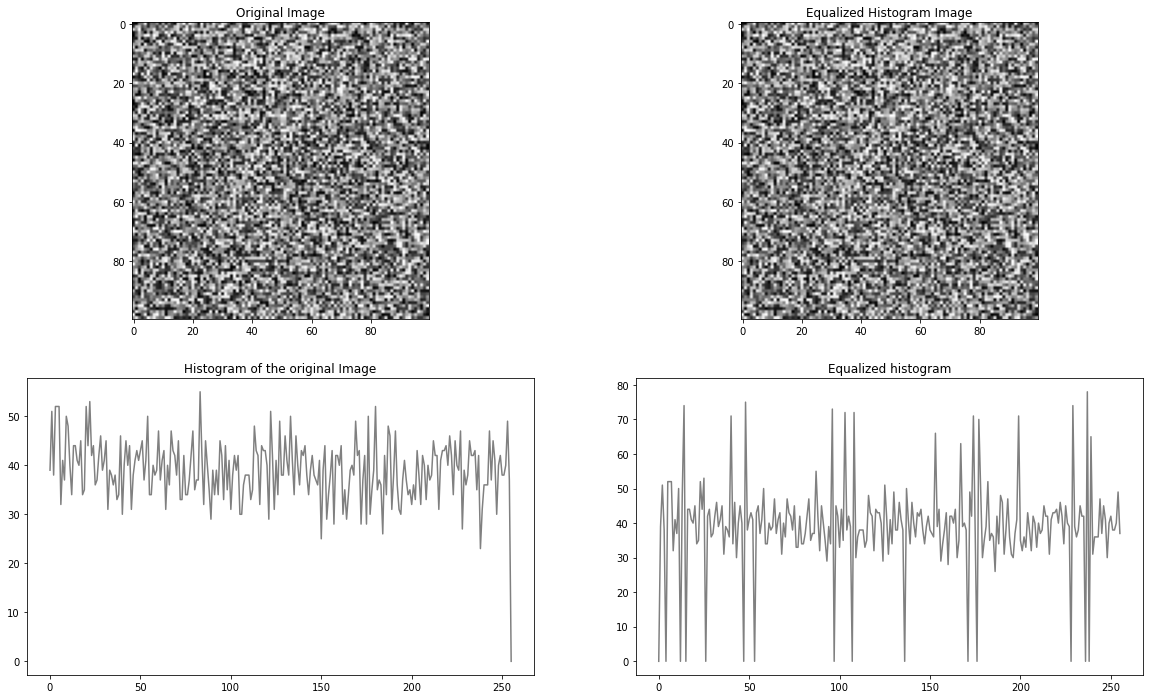

In [189]:
#--------------------------Q1----------------------------------
#--------------------------------------------------------------
#----------- Simpe Equalized histogram comparison--------------

histogram_comparison(img1)
histogram_comparison(img2)
histogram_comparison(img3)
histogram_comparison(img4)
histogram_comparison(img5)

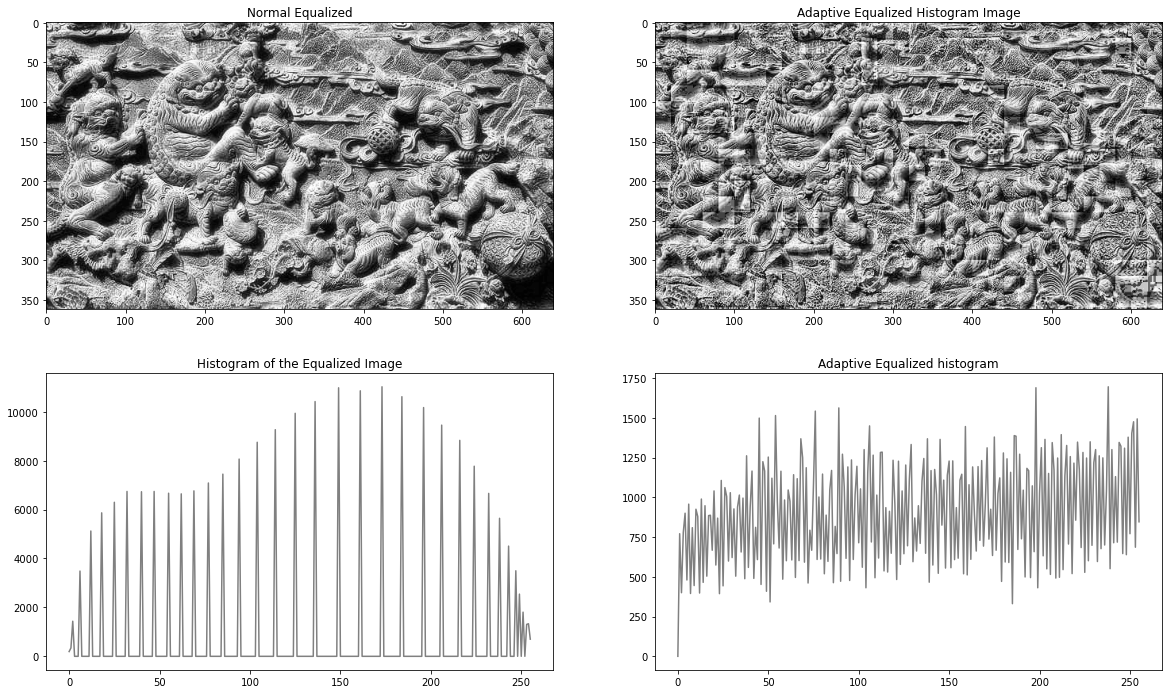

In [190]:
#--------------------------Q2----------------------------------
#--------------------------------------------------------------
#----------- Adoptive Equalized histogram comparison-----------

AHE_comparison(img1,20,20)
#       Too Small window sizes result in deteriorated image

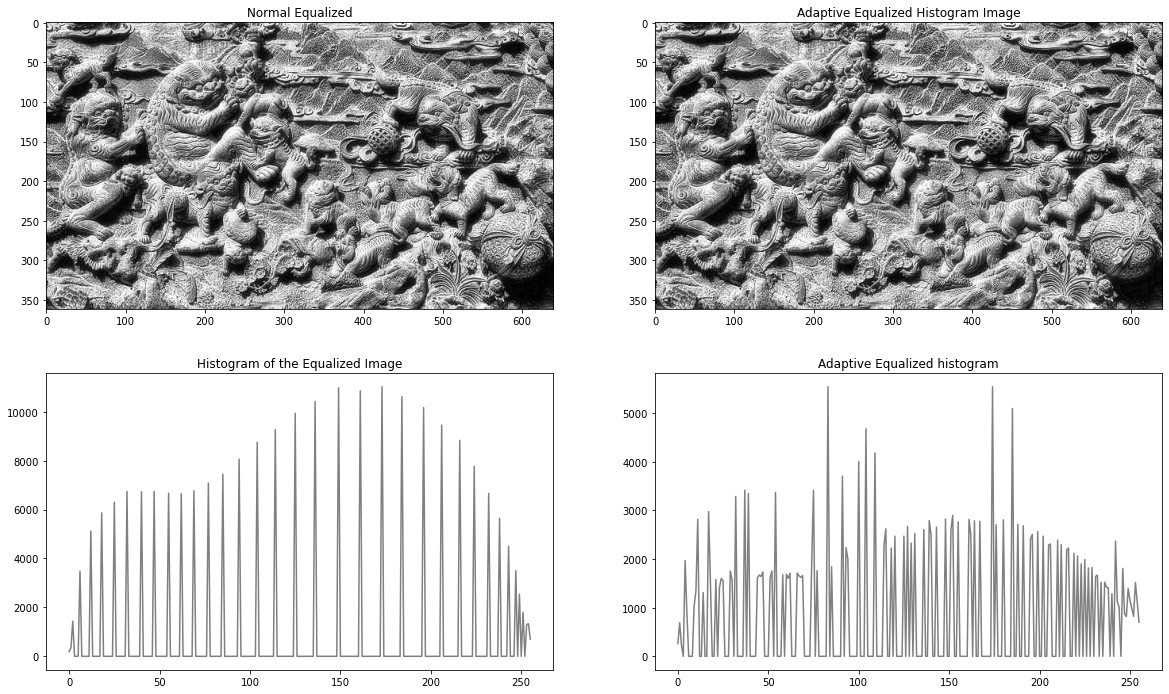

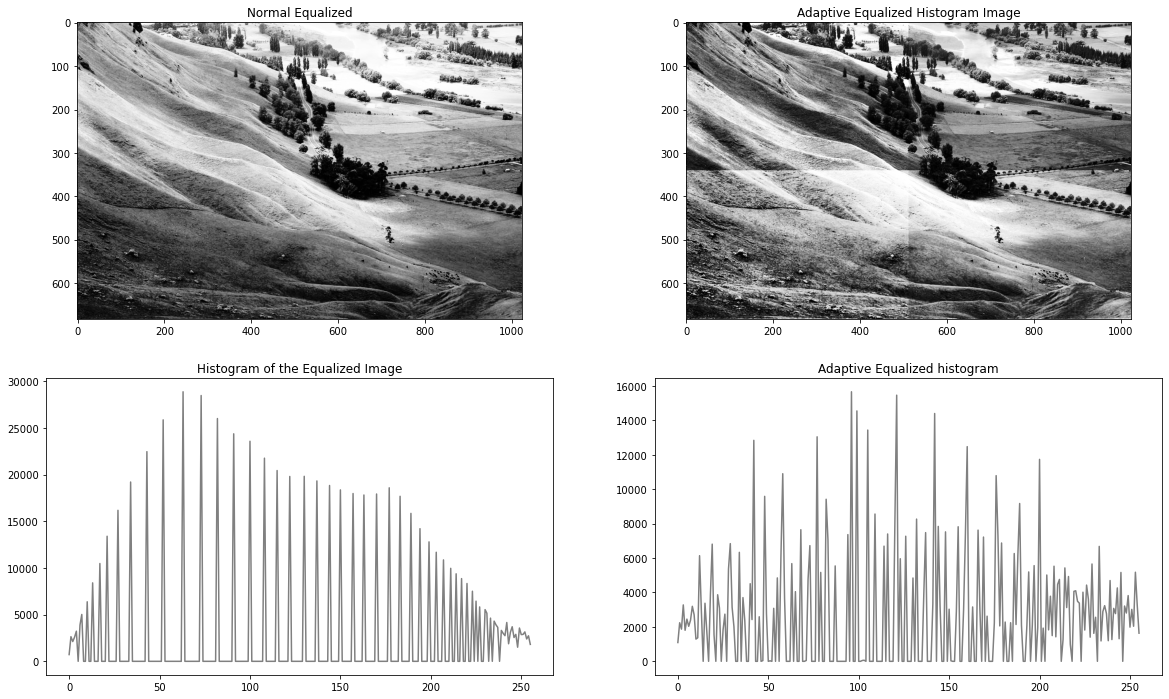

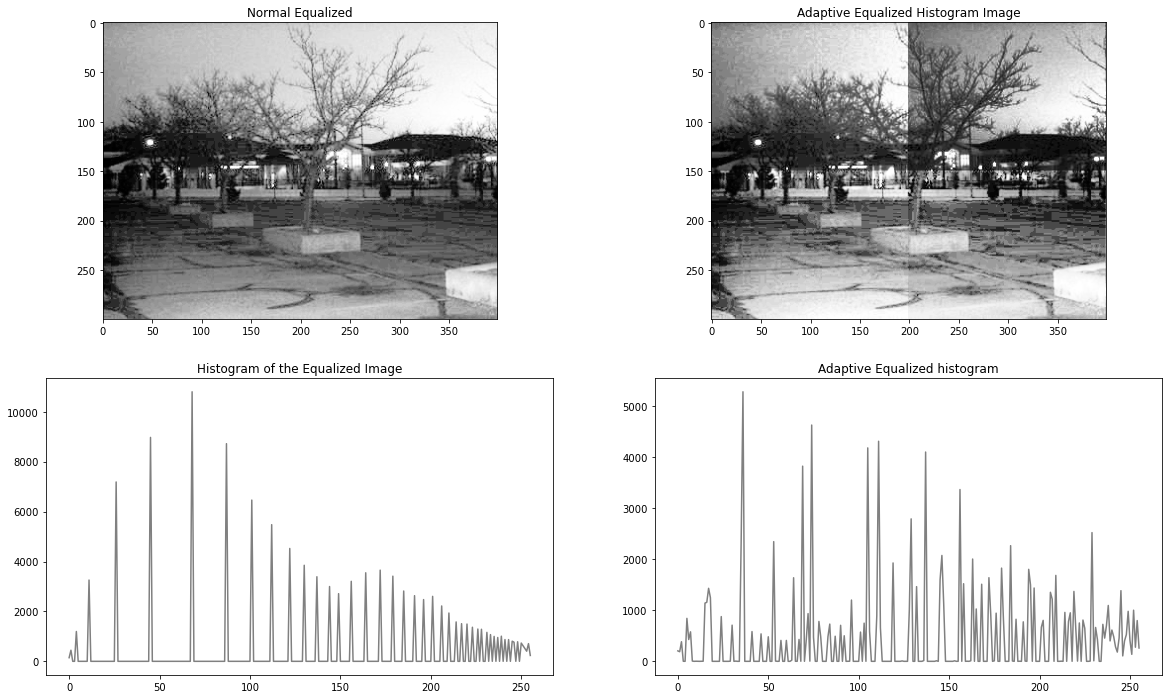

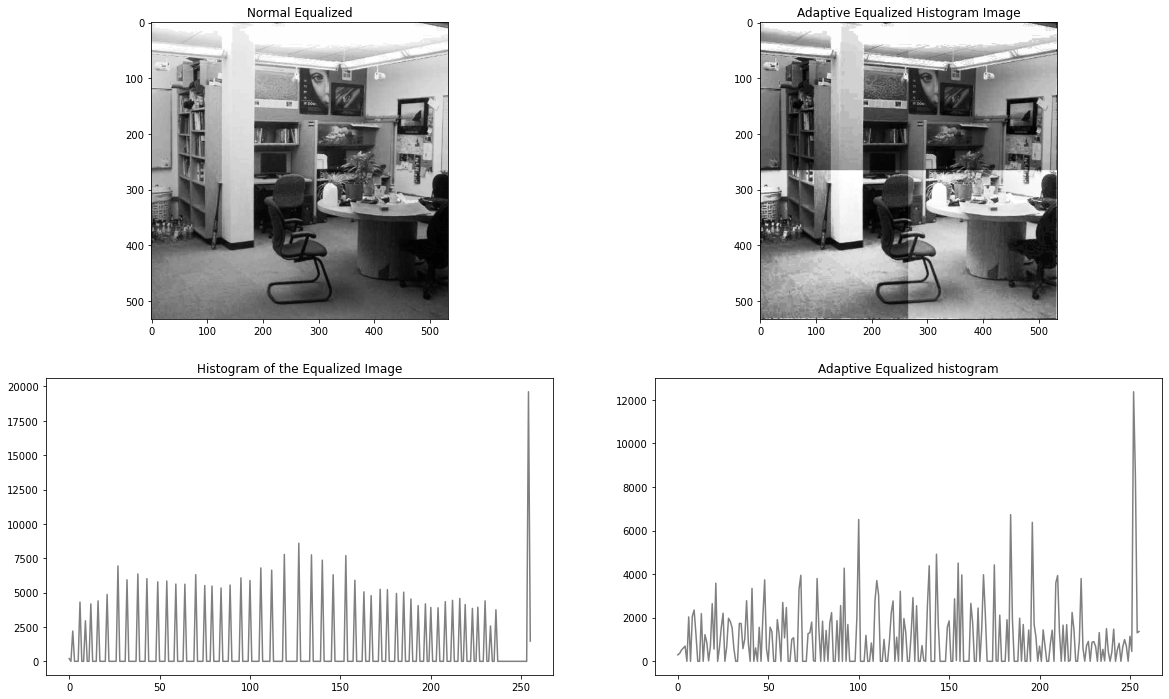

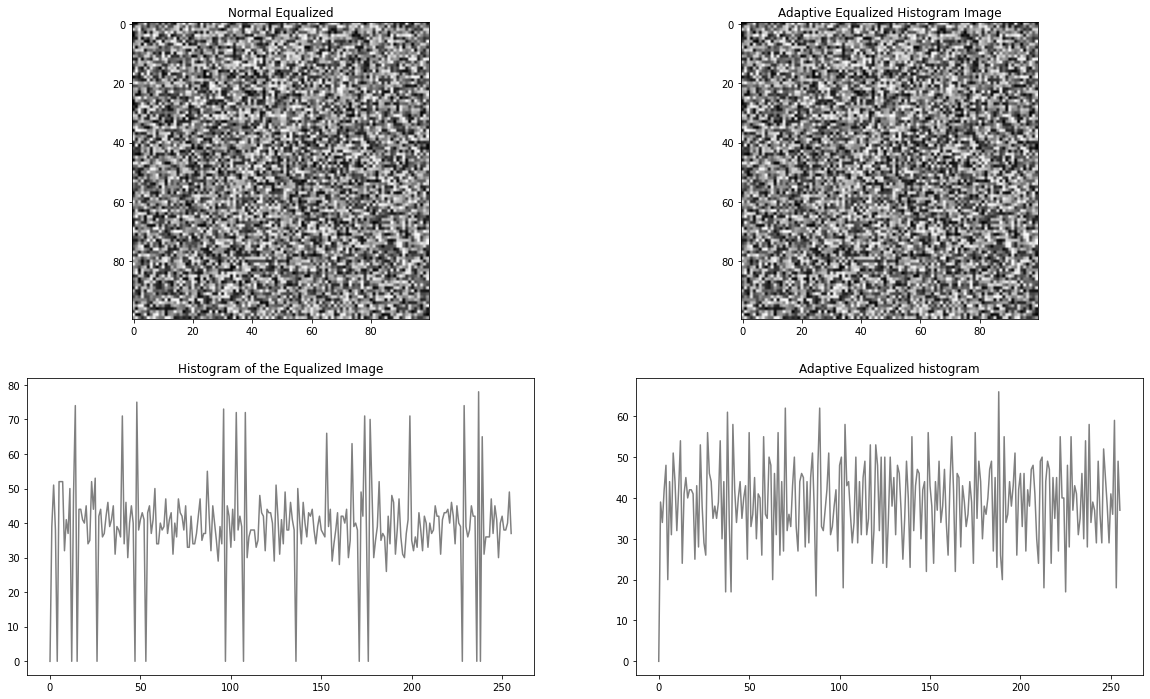

In [201]:
#     Comments: if we take patches and apply histogram equalization, we get patches as shown below

AHE_comparison(img1,int((img1.shape[0])/2),int((img1.shape[1])/2))
AHE_comparison(img2,int((img2.shape[0])/2),int((img2.shape[1])/2))
AHE_comparison(img3,int((img3.shape[0])/2),int((img3.shape[1])/2))
AHE_comparison(img4,int((img4.shape[0])/2),int((img4.shape[1])/2))
AHE_comparison(img5,int((img5.shape[0])/2),int((img5.shape[1])/2))

#AHE_comparison(img1,8,8)
#AHE_comparison(img2,8,8)
#AHE_comparison(img3,8,8)
#AHE_comparison(img4,8,8)
#AHE_comparison(img5,8,8)


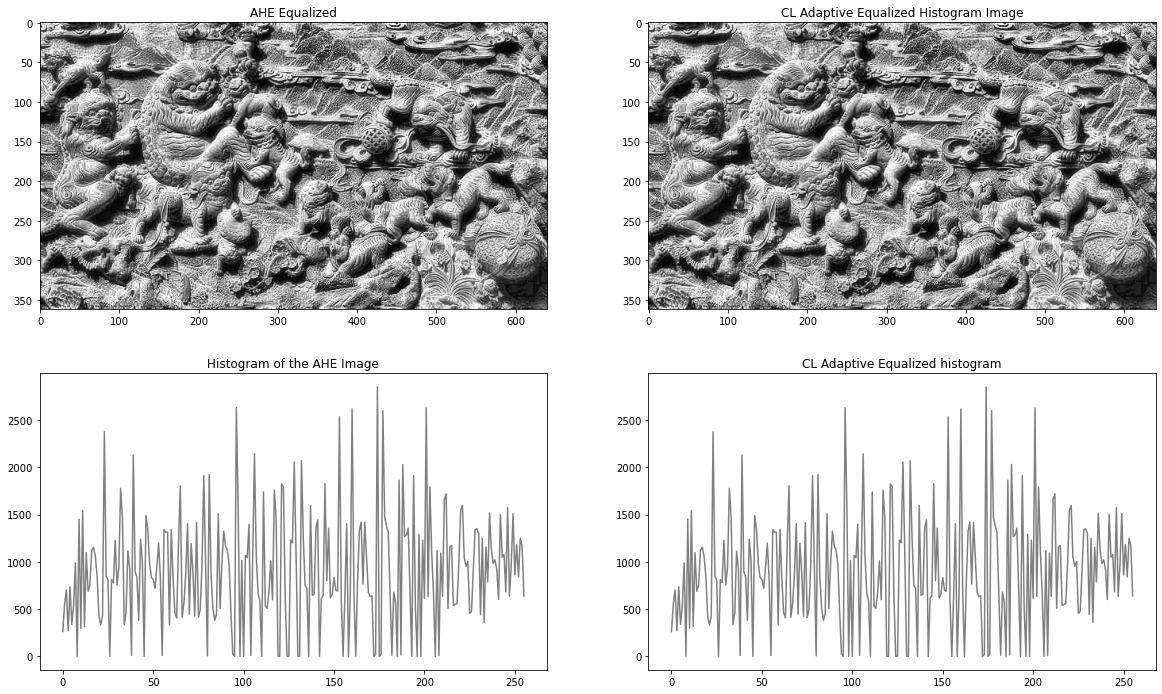

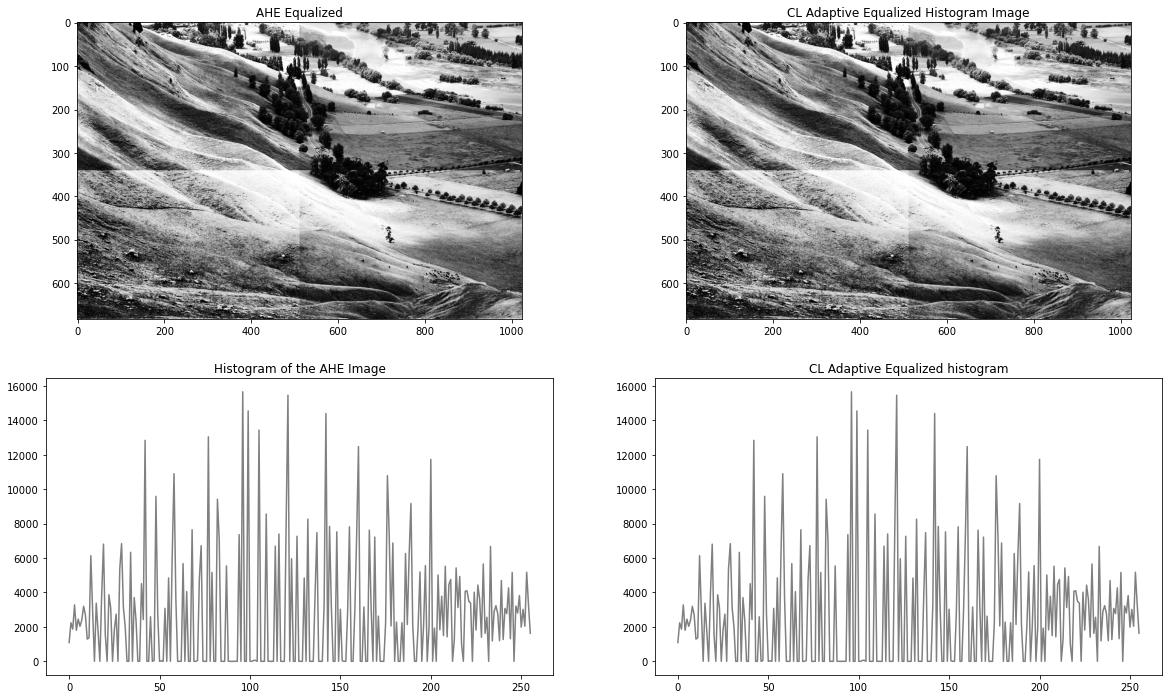

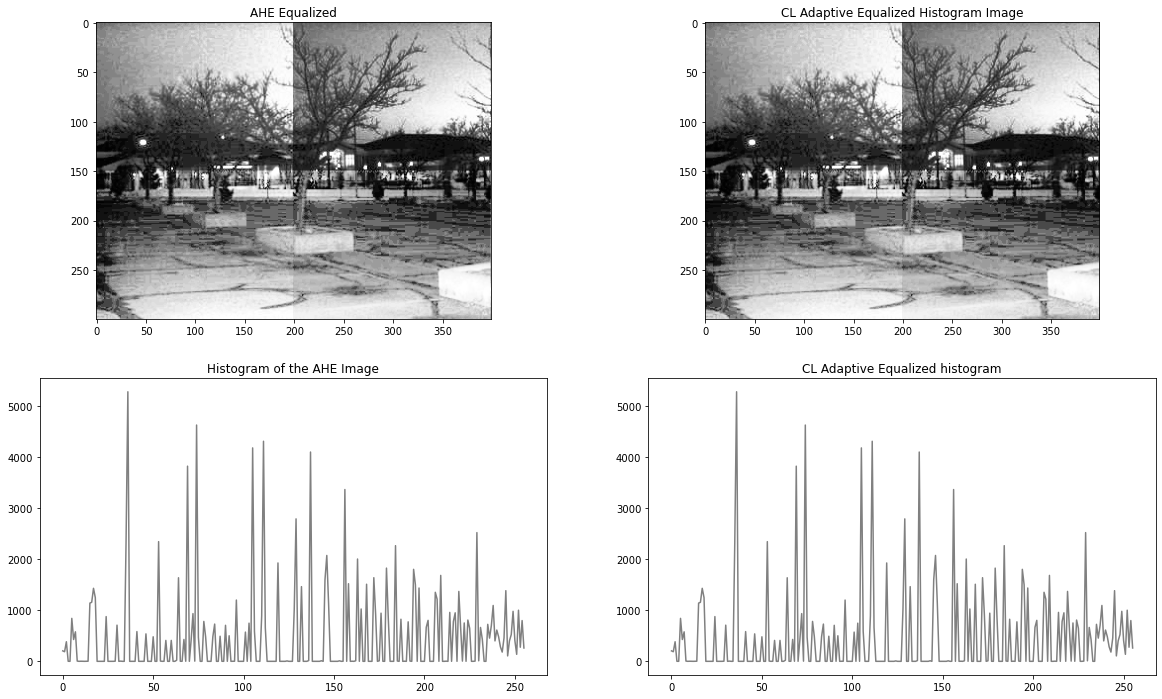

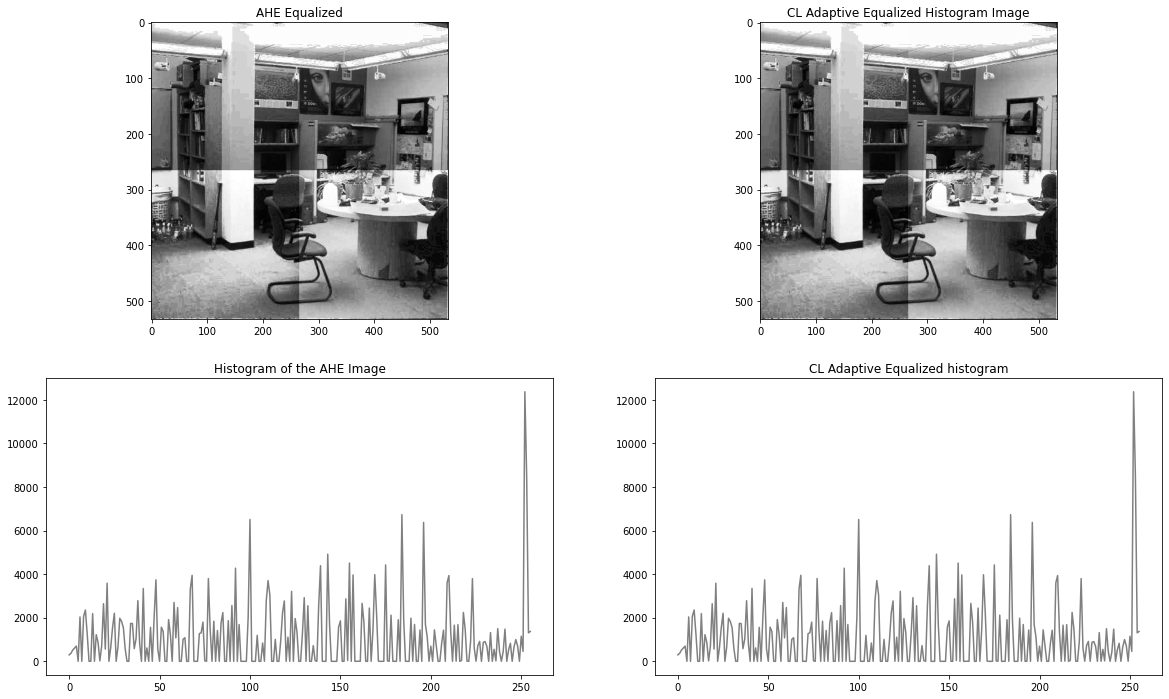

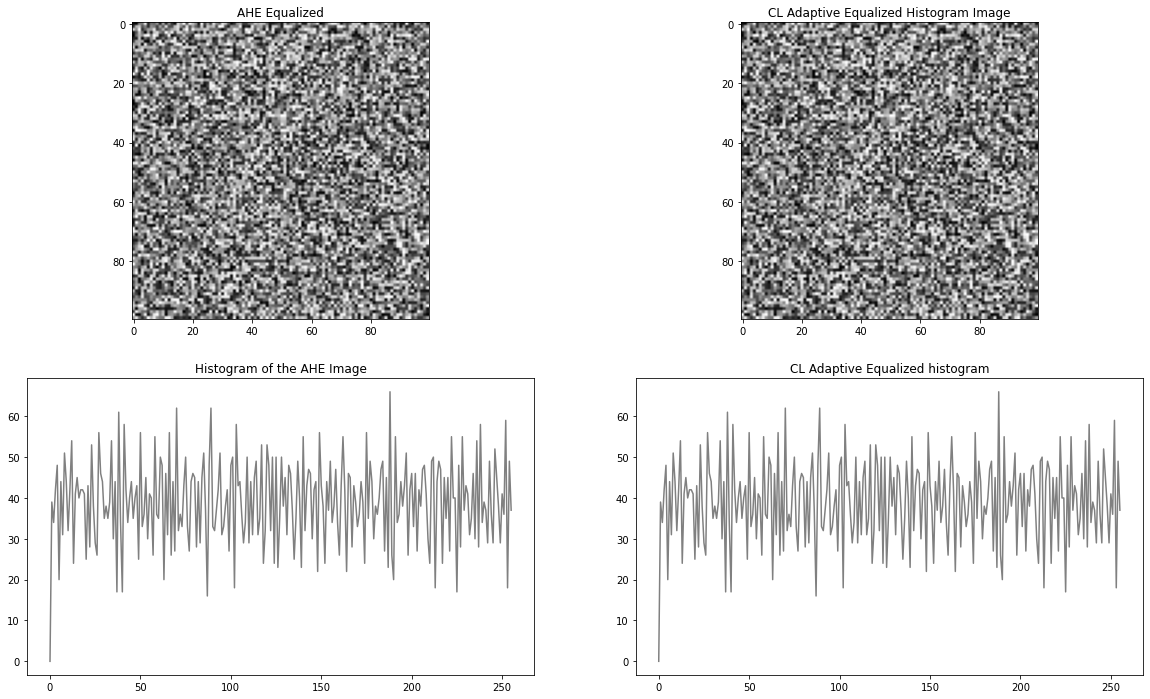

In [204]:
#--------------------------Q3----------------------------------
#--------------------------------------------------------------
#--Contrast Limited Adoptive Equalized histogram comparison----

CLAHE_comparison(img1,int((img1.shape[0])/4),int((img1.shape[1])/4),50)
CLAHE_comparison(img2,int((img2.shape[0])/2),int((img2.shape[1])/2),50)
CLAHE_comparison(img3,int((img3.shape[0])/2),int((img3.shape[1])/2),50)
CLAHE_comparison(img4,int((img4.shape[0])/2),int((img4.shape[1])/2),50)
CLAHE_comparison(img5,int((img5.shape[0])/2),int((img5.shape[1])/2),50)



In [198]:
clahe_model = cv.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
out = clahe_model.apply(img2)

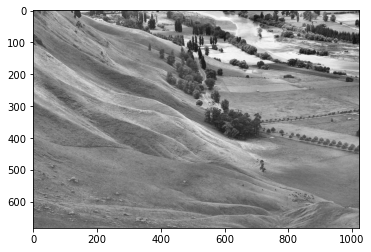

In [199]:
plt.imshow(out,'gray')

In [250]:
#--------------------------Q4----------------------------------
#--------------------------------------------------------------
#----------- Histogram based matching CBIR---------------------


path ='C:/Users/user3/Downloads/Documents/Training/3_Image_Processing_Labs/Lab3/input/CBIR/'
list_of_files = []

for root, dirs, files in os.walk(path):
    for file in files:
        list_of_files.append(os.path.join(root,file))
    
print(len(list_of_files))

DataBase=np.zeros((10000,256))
count=0
for name in list_of_files:
    img=cv.imread(name,0)
    DataBase[count,:]=image_histogram(img)
    count=count+1

10000


Text(0.5, 1.0, 'Match')

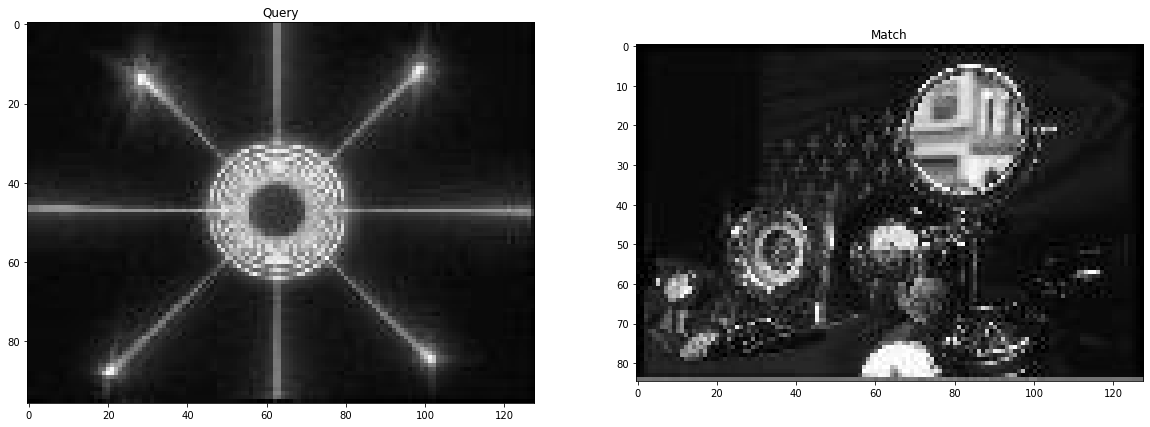

In [285]:
 

i1=cv.imread(list_of_files[np.random.randint(1,10000)],0)
i1_hist=image_histogram(i1)
e=(DataBase-i1_hist)**2
e2=np.sum(e,axis=1)
e2[np.where(e2==0)]=e2.max()
match=np.where(e2==e2.min())
fig, ax = plt.subplots(1, 2,figsize=(20,12))
ax[0].imshow(i1,'gray')
ax[0].set_title('Query')
index=int(match[0])
ax[1].imshow(cv.imread(list_of_files[index],0),'gray')
ax[1].set_title('Match')